# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
%matplotlib notebook

from IPython.core.pylabtools import figsize

figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [3]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [4]:
# Sua análise da parte 1 começa aqui.
dataframe.head()

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21


In [5]:
dataframe.shape

(10000, 2)

In [6]:
norm = dataframe.normal
binom = dataframe.binomial
stats = pd.DataFrame(data={
    'normal': [
        norm.mode()[0],
        norm.mean(),
        norm.median(),
        norm.std(),
        norm.var()
    ],
    'binomial': [
        binom.mode()[0],
        binom.mean(),
        binom.median(),
        binom.std(),
        binom.var()
    ]
}, index=['mode', 'mean', 'median', 'std','var'])
stats.T

,mode,mean,median,std,var
normal,4.310399,19.991456,19.98962,4.013850,16.110988
binomial,20.000000,20.097000,20.00000,4.041191,16.331224


In [7]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
normal,10000.0,19.991456,4.013850,4.310399,17.309638,19.98962,22.684324,35.704951
binomial,10000.0,20.097000,4.041191,6.000000,17.000000,20.00000,23.000000,36.000000


**Verificando o formado das duas distribuições**

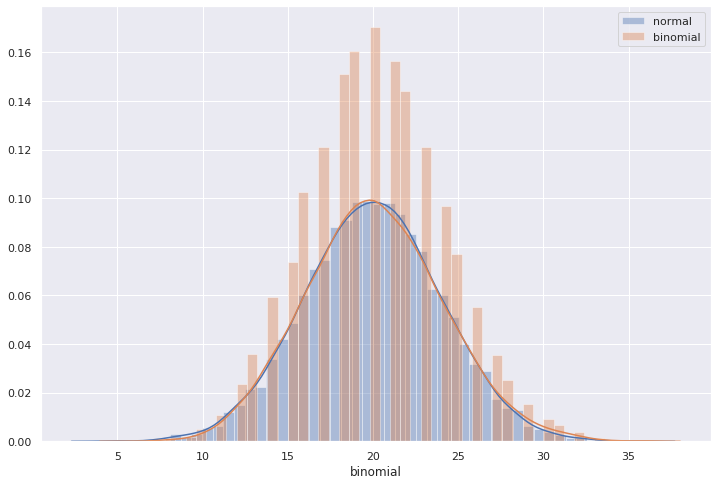

In [8]:
sns.distplot(dataframe['normal']);
sns.distplot(dataframe['binomial']);
plt.legend(labels=['normal','binomial'])

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [9]:
def q1():
    quartis = dataframe.quantile([0.25, 0.5, 0.75])

    return tuple((quartis['normal'] - quartis['binomial']).round(3))
q1()

(0.31, -0.01, -0.316)

In [10]:
# Outra maneira de resolver
#   q1_norm, q2_norm, q3_norm = np.percentile(dataframe.normal, (25, 50, 76))
#   q1_binom, q2_binom, q3_binom = np.percentile(dataframe.binomial, (25, 50, 76))
#    
#   answer = q1_norm - q1_binom, q2_norm-q2_binom, q3_norm - q3_binom
#
#   return np.around(answer, decimals = 3)

Para refletir:

* Você esperava valores dessa magnitude?
<br/>_R: Eu não espera valores dessa magnitude pois mesmo se tratando de duas distribuições diferentes os valores estão sempre dentro do mesmo intervalo, nesse caso de 0 a 35._

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?
<br/>_R: Ambas as amostras estão no mesmo intervalo e com a média muito proxima, por isso deram esses valores._

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [11]:
def q2():
    ecdf = ECDF(dataframe.normal)
    mean = stats.normal.loc['mean']
    std =  stats.normal.loc['std']
    
    return float(np.round(ecdf(mean + std) - ecdf(mean - std) , decimals = 3))
q2()

-0.684

Para refletir:

* Esse valor se aproxima do esperado teórico? <br>
_R: Sim, pois como se trata de uma distribuição normal 68% dos dados estão entre $+1 \sigma$ ou $-1 \sigma$ da $\mu$ conforme mostra a figura abaixo:_
![normal](https://cdn-images-1.medium.com/max/1600/1*IZ2II2HYKeoMrdLU5jW6Dw.png)
<br/>
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

In [12]:
ecdf = ECDF(dataframe.normal)
mean = stats.normal.loc['mean']
std =  stats.normal.loc['std']

In [13]:
np.round(ecdf(mean - std * 2 ) - ecdf(mean + std * 2), decimals = 3)

-0.954

In [14]:
np.round(ecdf(mean - std * 3) - ecdf(mean + std * 3), decimals = 3)

-0.997

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [15]:
def q3():
    mean_dif = stats.binomial.loc['mean'] - stats.normal.loc['mean']
    var_dif = stats.binomial.loc['var'] - stats.normal.loc['var']
    
    return tuple(np.round((mean_dif, var_dif) , decimals = 3))
q3()

(0.106, 0.22)

Para refletir:

* Você esperava valore dessa magnitude?
<br/>_R: Sim, pois o conjunto de valores circulam sempre no mesmo intervalo portanto tanto as médias como as variâncias são bem proximas._
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?
<br/>_R: Ao realizar alterações do valor $n$ a distribuição tera um aumento ou dimuinução no valor da sua média $\mu$, essas aletrações deixaram a distribuição mais ou menos esparça. Segue exemplos nas celulas abaixo:_

**Aumentando o valor de $n$**

In [16]:
dataframe2 = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(150, 0.2, size=10000)})

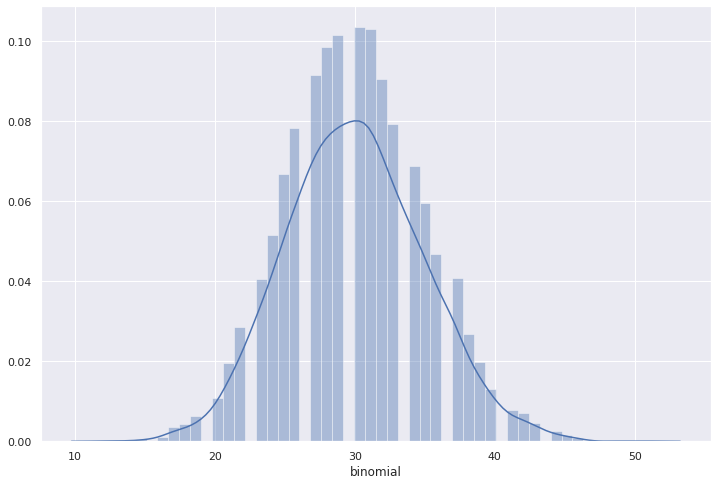

In [17]:
sns.distplot(dataframe2['binomial'])

In [18]:
dataframe2.describe().T

,count,mean,std,min,25%,50%,75%,max
normal,10000.0,19.983095,3.964038,4.574499,17.238209,19.99071,22.693723,35.769324
binomial,10000.0,29.982000,4.922652,12.000000,27.000000,30.00000,33.000000,51.000000


**Diminuindo o valor de $n$**

In [19]:
dataframe3 = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(50, 0.2, size=10000)})

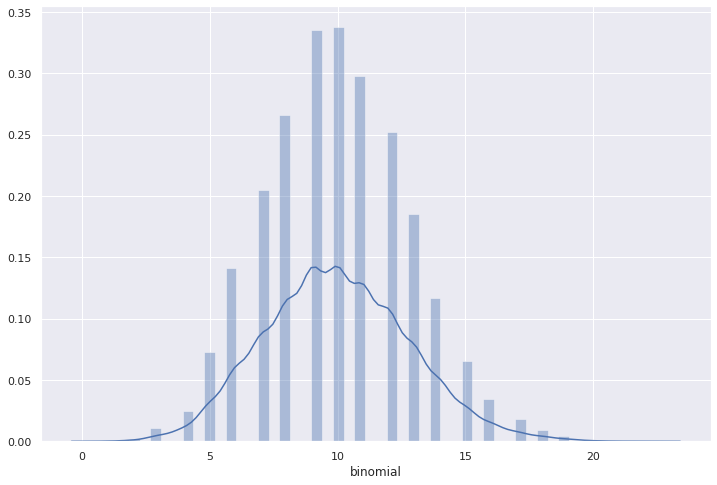

In [20]:
sns.distplot(dataframe3['binomial'])

In [21]:
dataframe3.describe().T

,count,mean,std,min,25%,50%,75%,max
normal,10000.0,20.056557,3.951721,2.818436,17.359828,20.085551,22.758256,34.146127
binomial,10000.0,9.983800,2.796340,1.000000,8.000000,10.000000,12.000000,22.000000


## Parte 2

### _Setup_ da parte 2

In [22]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [23]:
# Sua análise da parte 2 começa aqui.
stars.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


In [24]:
stars.shape

(17897, 9)

In [25]:
stars.describe().T

,count,mean,std,min,25%,50%,75%,max
mean_profile,17897.0,111.078321,25.652705,5.812500,100.929688,115.078125,127.085938,192.617188
sd_profile,17897.0,46.549021,6.843040,24.772042,42.375426,46.946435,51.022887,98.778911
kurt_profile,17897.0,0.477897,1.064056,-1.876011,0.027108,0.223241,0.473349,8.069522
skew_profile,17897.0,1.770417,6.168058,-1.791886,-0.188528,0.198736,0.928206,68.101622
mean_curve,17897.0,12.614926,29.473637,0.213211,1.923077,2.801839,5.464883,223.392140
sd_curve,17897.0,26.326918,19.471042,7.370432,14.437330,18.459977,28.428152,110.642211
kurt_curve,17897.0,8.303574,4.506217,-3.139270,5.781485,8.433872,10.702973,34.539844
skew_curve,17897.0,104.859419,106.517270,-1.976976,34.957119,83.068996,139.310905,1191.000837


## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [26]:
def q4():
    false_mean_profile = stars[stars['target'] == False]['mean_profile']
    false_pulsar_mean_profile_standardized = (
        false_mean_profile - false_mean_profile.mean()) / (false_mean_profile.std())

    ecdf = ECDF(false_pulsar_mean_profile_standardized)
    
    return tuple(np.round(ecdf(sct.norm.ppf([0.8, 0.9, 0.95])),3))
q4()

(0.806, 0.911, 0.959)

Para refletir:

* Os valores encontrados fazem sentido?
<br/>_R: Os valores fazem sentido pois o ECDF segue uma distribuição normal_.
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
<br/>_R: Trata-se de uma distribuição normal que sofreu uma padronização para que seus valores ficassem entre $+1$ e $-1$._

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [27]:
def q5():
    quantiles = [0.25, 0.5, 0.75]

    false_mean_profile = stars[stars['target'] == False]['mean_profile']
    false_pulsar_mean_profile_standardized = (
        false_mean_profile - false_mean_profile.mean()) / (false_mean_profile.std())

    false_quantis = false_pulsar_mean_profile_standardized.quantile(quantiles)

    return tuple(np.round((false_quantis - sct.norm.ppf(quantiles)), decimals=3))
q5()

(0.027, 0.04, -0.004)

Para refletir:

* Os valores encontrados fazem sentido?
<br/>_R: Sim, pois os valores da estão entre $+1$ e $-1$._
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
<br/>_R: Trata-se de uma distribuição normal que sofreu uma padronização para que seus valores ficassem entre $+1$ e $-1$._
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.